# **VEHICLE EMISSIONS CLASSIFICATION FOR REGULATORY COMPLIANCE MODEL PROJECT**
**Author: Nduta Karanja**

## 1.INTRODUCTION

**1.1. Problem Statement**

* **Context:** Vehicle emissions have become a critical issue in addressing environmental sustainability and public health. In the UK, stringent regulations are in place to reduce vehicle emissions and combat air pollution. High levels of CO2 emissions from vehicles contribute significantly to climate change, deteriorate air quality, and pose health risks such as respiratory and cardiovascular diseases. Regulatory agencies face the challenge of monitoring and enforcing emission standards effectively.

* **Business Problem:** 
Regulatory agencies need an efficient method to categorize vehicles into emission levels to prioritize enforcement actions and promote cleaner alternatives. The current process of manual assessment and enforcement is both time-consuming and prone to errors. Moreover, consumers lack accessible tools to understand and compare vehicle emissions easily.

* **Objective:**  Develop a robust classification model to categorize vehicles into three emission levels: Low, Moderate, and High, based on CO2 emissions data to help achieve Automatic Classification of Vehicles,Prioritize Enforcement Actions and Support Cleaner Alternatives.
 
**1.2. Project Goals And Stakeholders**

*Primary Goal:*

 - **Create a Classification Model** by developing and potentially deploying a machine learning model that categorizes vehicles into emission levels based on their CO2 emissions. The model should be accurate and reliable to ensure effective regulatory compliance.

*Secondary Goals:*

  - **Facilitate development and implemention of policies**  by providing *policy makers* with data driven insights aimed at reducing vehicle emmission,improving environmental quality and tracking effectiveness of emission reduction measures.
  - **Facilitate Regulatory Actions**  by enabling *regulatory agencies* to quickly and accurately identify high-emission vehicles for targeted actions and compliance checks.
  - **Enhance Awareness** by facilitating *Environmrental Advocacy Groups* with data and tools to support emmission reduction drives and providing *consumers* with a user-friendly interface or tool that allows consumers to check and compare vehicle emissions, encouraging the adoption of cleaner vehicles.
  - **Support Data-Driven Decisions** by offering insights and reports that can guide policy-making and regulatory strategies for improving air quality and reducing environmental impact.
  - **Facilitate Emission Reduction Strategy Development** by providing *Automotive Manufacturers* with a framework and tools to develop effective emission reduction strategies that align with current and anticipated regulatory requirements. This goal aims to support manufacturers in designing and implementing changes in their production processes and vehicle designs to achieve lower emissions and comply with environmental standards.

**1.3. Scope and Limitations**

 *Scope:*

   - **Data Focus**-The project centers on analyzing and classifying vehicle emissions data. It leverages a dataset containing information on various vehicle attributes and CO2 emissions.
   - **Model Development**-The project involves developing machine learning models (Logistic Regression and Decision Tree) to classify vehicles into predefined emission categories.
   - **Regulatory Use Case**- The classification model will be used by regulatory agencies to enhance their monitoring and enforcement capabilities.

*Limitations:*

   - **Data Quality**- The effectiveness of the classification model depends on the quality and completeness of the dataset. Inaccurate or incomplete data may affect model performance.
   - **Feature Limitations**-The model relies on available features such as engine size and CO2 emissions. Additional factors like driving conditions and maintenance history are not considered, which might influence actual emissions.
   
   - **Generalizability** -The model's performance is based on the specific dataset and may vary when applied to different datasets or vehicle types. Continuous updates and validation are required to maintain accuracy.

# 2.DATA

**2.1. Data Understanding**

  - **Name:** Vehicle Emissions Data Set (uk_gov_data_dense_preproc.csv)
  - **Source:** Kaggle

**Description:** This dataset contains information on 6,756 vehicles, including various features related to vehicle specifications and emissions. It is designed to facilitate analysis and modeling for vehicle emissions, which can be used for classification, regulatory compliance, and environmental impact studies.The fields are:

1. `car_id`                : **Number** - A unique identifier for each vehicle.
2. `manufacturer`          : **Categorical String** - The name of the vehicle manufacturer (e.g., Ford, Toyota, BMW)
3. `model`                 : **Categorical String** - The specific model of the vehicle (e.g., Focus, Corolla, X5)
4. `description`           : **Categorical String** - Additional details about the vehicle, which may include information on design, features, or special attributes.
5. `transmission`          : **Categorical String** - Gearbox type, such as "Manual" or "Automatic." This feature may influence emissions based on the type of transmission used.
6. `transmission_type`     : **Categorical String** - "Manual", "Automatic", or "Electric - Not Applicable".
7. `engine_size_cm3`       : **Number** - The volume of the engine’s gas displacement in cubic centimeters (cm³).
8. `fuel`                  : **Categorical String** -The type of fuel used by the vehicle (e.g., Petrol, Diesel, Electric). Different fuels have different emission profiles.
9. `powertrain`            : **Categorical String** -Describes the powertrain configuration (e.g., Front-Wheel Drive, All-Wheel Drive). The powertrain can impact fuel efficiency and emissions.
10. `power_ps`             : **Number** - Power of vehicle in PferdStarke (metric measure of horsepower, equivalent to 98.6% of one HP) This feature is important for understanding the vehicle’s performance and potential emissions.
11. `co2_emissions_gPERkm~`: **Number** - The CO2 emissions of the vehicle measured in grams per kilometer (g/km) according to the Worldwide Harmonized Light Vehicles Test Procedure (WLTP). This is the target variable for classification into emission levels.


In [754]:
#Import relevant libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")


**2.2. Data Inspection And Analysis**

To get a general sense of the structure and contents,we examine our dataset for preparation to ensure that the data is clean, well-understood, and properly prepared for creating accurate and reliable models.This is by checking basic information like the shape and consistency,looking out for missing, duplicates and NaN values,checking for duplicates



In [755]:
# First step is loading our Data

df = pd.read_csv("uk_gov_data_dense_preproc.csv", encoding='windows-1252')

#display content of our Dataframe
df

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...
6751,6752.0,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,76.0
6752,6753.0,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,57.0
6753,6754.0,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,76.0
6754,6755.0,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,57.0


In [756]:
# Confirm the number of rows and columns
print(df.shape)


(6756, 11)


In [757]:
# Check for missing values
print(df.isnull().sum())

car_id                  0
manufacturer            0
model                   0
description             0
transmission            0
transmission_type       0
engine_size_cm3         0
fuel                    0
powertrain              0
power_ps                0
co2_emissions_gPERkm    0
dtype: int64


In [758]:
# Check for duplicate rows
print(df.duplicated().sum())


0


As observed above,we do not have mossing or NaN values.

Next,we get a concise summary of the DataFrame to nderstand the type of data each column contains by use of `df.dtypes` function in Python .
This is to help us identify and create consistency in our data as we will use categorical and numerical datatypes during our modeling.

In [759]:
# Get a concise summary of the DataFrame to nderstand the type of data each column contains 
print(df.info())
# Get the column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6756 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6756 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6756 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB
None
Index(['car_id', 'manufacturer', 'model', 'description', 'transmission',
       'transmission_type', 'engine_size_cm3', 'fuel', 'powertrain',
       'power_ps', 'co2_emiss

In [760]:
# Step 1: Check for NaN values in each column
nan_summary = df.isna().sum()

# Step 2: Display columns with NaN values
columns_with_nan = nan_summary[nan_summary > 0]

# Print out columns with NaN values
print("Columns with NaN values:")
print(columns_with_nan)

# Optionally, you can also check the percentage of missing values per column
percentage_nan = (nan_summary / len(df)) * 100
columns_with_nan_percentage = percentage_nan[nan_summary > 0]

print("\nPercentage of NaN values in columns with missing data:")
print(columns_with_nan_percentage)

Columns with NaN values:
Series([], dtype: int64)

Percentage of NaN values in columns with missing data:
Series([], dtype: float64)


In [761]:
# Calculate cardinality for all columns
cardinalities = df.nunique()
print(cardinalities)



car_id                  6756
manufacturer              41
model                    440
description             2981
transmission              42
transmission_type          3
engine_size_cm3          111
fuel                       8
powertrain                 6
power_ps                 200
co2_emissions_gPERkm     290
dtype: int64


## Summary Statistics Insights
The bellow summary provides a high-level understanding of the data’s structure and distribution, which is crucial for feature engineering, modeling, and interpretation in your analysis or machine learning tasks.

In [762]:
# Summary statistics for numerical columns
df.describe()

,car_id,engine_size_cm3,power_ps,co2_emissions_gPERkm
count,6756.000000,6756.000000,6756.000000,6756.000000
mean,3378.500000,1793.288040,184.286560,154.775607
std,1950.433542,825.922833,109.761828,54.972233
min,1.000000,0.000000,0.000000,0.000000
25%,1689.750000,1333.000000,120.000000,131.000000
50%,3378.500000,1749.000000,150.000000,151.000000
75%,5067.250000,1996.000000,211.000000,179.250000
max,6756.000000,6749.000000,800.000000,380.000000




1.`engine_size_cm3`:

* The *mean* engine size is around **1793.3 cm³**, but there is considerable *variability* (standard deviation of 825.9 cm³).
* The *range* (0 to 6749 cm³) suggests a *wide diversity*V in engine sizes. 
* The *median* (1749 cm³) is slightly below the mean, indicating a *right-skewed distribution* where  ***more* vehicles have smaller engines compared to larger ones.**

2.`power_ps`

* The *mean* power is 184.3 PS, with significant variability (standard deviation of 109.8 PS).
* *The *wide range* (0 to 800 PS) and the *higher median* (150 PS) compared to the *25th percentile* suggest that **while most vehicles have moderate power, there are also some with very high power ratings**. The distribution is likely right-skewed.

3.`co2_emissions_gPERkm`

* The *mean* CO2 emissions are 154.8 g/km, with a *standard deviation* of 55.0 g/km **indicating considerable variability**.
* The *range* from 0 to 380 g/km **shows a broad spectrum of emission levels.**
*  The *median* (151 g/km) is *slightly below the mean*, indicating a right-skewed distribution. **Most vehicles have emissions around the median, but a significant number have higher emissions.**


From this summarry we can conclude:

* **Wide Range of Values:** All numerical features have a wide range, indicating variability in vehicle specifications.
* **Skewed Distributions:** Variables such as engine_size_cm3, power_ps, and co2_emissions_gPERkm show right-skewed distributions, with more data points clustering towards the lower end.
* **High Variability:** Features such as engine_size_cm3 and power_ps have high standard deviations relative to their means, suggesting significant variability in these characteristics among the vehicles.
* **Potential Outliers:** The wide range and high maximum values in engine_size_cm3 and power_ps might indicate the presence of outliers or extreme values in these columns.

## Visualization

For our **visualization analysis**, we look at different aspects of our data in relation to emission.
Emissions Outlliers will be treated as:higher side as high-level emission release and lower side as low-level emmission release.Our goal is to maintain the lowest levels of emissions as consumers get to enjoy their ultimate choice and taste in motor vehicles so we will pick up on arlarming levels of emissions

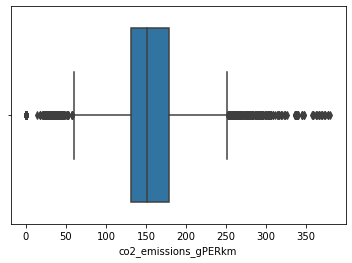

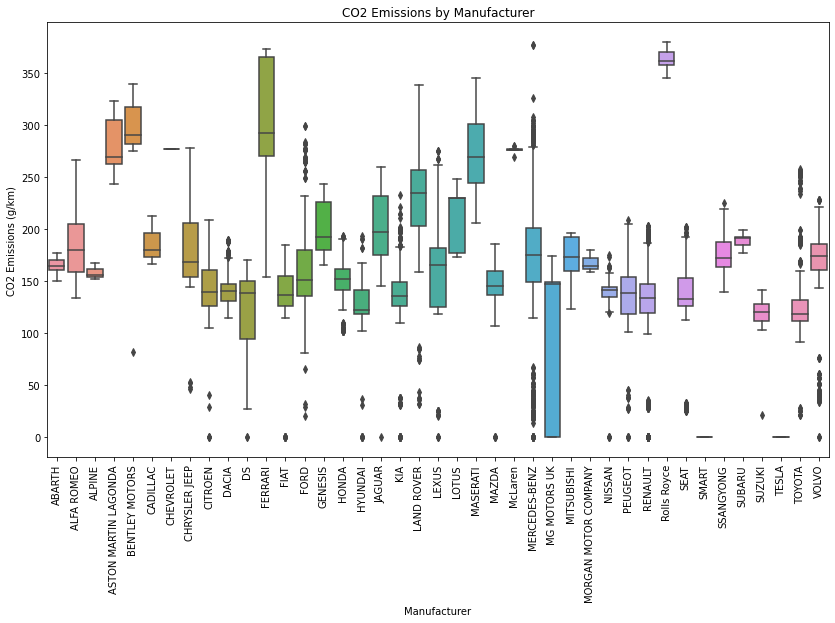

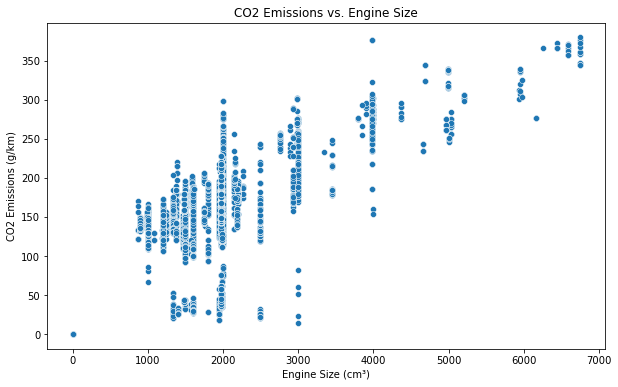

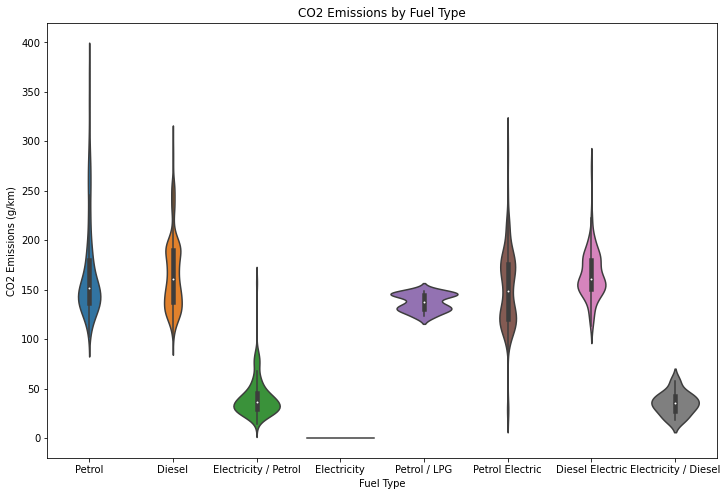

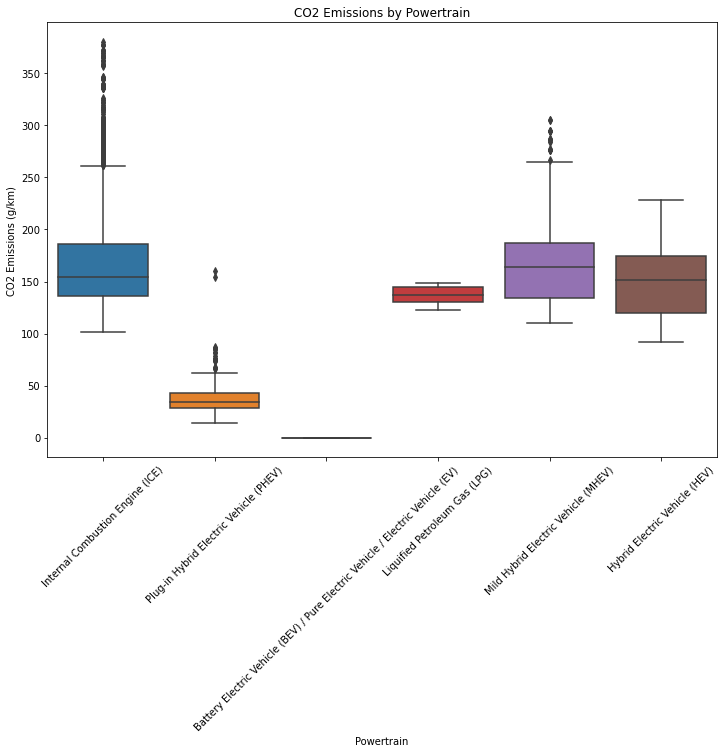

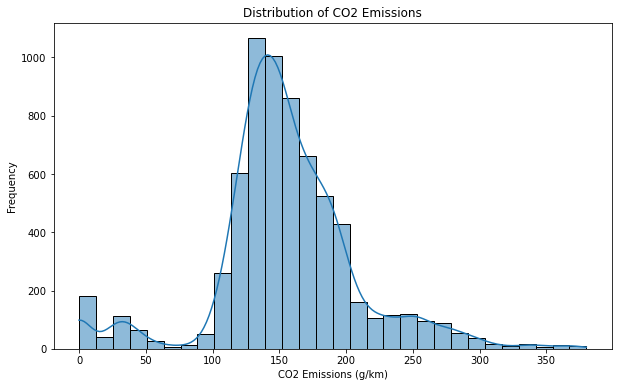

In [763]:

# Box plot to visualize outliers in 'co2_emissions_gPERkm'
sns.boxplot(df['co2_emissions_gPERkm'])
plt.show()

# Example: Remove outliers based on IQR
Q1 = df['co2_emissions_gPERkm'].quantile(0.25)
Q3 = df['co2_emissions_gPERkm'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['co2_emissions_gPERkm'] >= (Q1 - 1.5 * IQR)) & (df['co2_emissions_gPERkm'] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y='co2_emissions_gPERkm', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine_size_cm3', y='co2_emissions_gPERkm', data=df)
plt.title('CO2 Emissions vs. Engine Size')
plt.xlabel('Engine Size (cm³)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='fuel', y='co2_emissions_gPERkm', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='powertrain', y='co2_emissions_gPERkm', data=df)
plt.title('CO2 Emissions by Powertrain')
plt.xlabel('Powertrain')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['co2_emissions_gPERkm'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

## Visualization Summary

From the observation above,we get to see:
   * the distribution of CO2 Emission accross all manufacturers with most of the highest emission releasing cars being `sports cars`(Ferraris,masseratis),`
   *  As the `engine size` increases,emmission also increase  (as very high levels are observed in big engine cars like Rolls Royce and land Rovers)
   This is mainly observed in `internal combastion engine cars`
   * `Petrol` cars are also represented as the highest emitting car followed by `Diesel` units but by a significant gap indicating need for regulations
   * `Electric` cars have the lowest levels of emissions with pure electrics at level zero
   *  According to the known UK vehicle emission standards,our data shows `modarate emision levels` as the highest distribution (Statistical summary-Most vehicles have emissions around the median, but a significant number have higher emissions)

**2.3. Data Preprocessing And Feature Engineering**

## Identify features and target
The target variable for classification into emission levels is the CO2 emissions of the vehicle measured in grams per kilometer (g/km) according to the Worldwide Harmonized Light Vehicles Test Procedure (WLTP),so we separate the data into `X` and `y` accordingly:

In [764]:
#Identify features and targets
y = df['co2_emissions_gPERkm']
X = df.drop('co2_emissions_gPERkm', axis=1)

In the UK, CO2 emissions are typically categorized by levels, particularly in the context of vehicles and their emissions. Here’s a general breakdown according to UK standards:

* **Low Emissions**
For vehicles, "low emissions" usually refers to those that produce less than 100 grams of CO2 per kilometer. Electric vehicles (EVs) and hybrid vehicles often fall into this category.

* **Medium Emissions**
This category generally includes vehicles that emit between 100 and 200 grams of CO2 per kilometer. These vehicles are typically more fuel-efficient than higher-emission models but still produce a significant amount of CO2.

* **High Emissions**
Vehicles that emit more than 200 grams of CO2 per kilometer are considered to have high emissions. These are often larger, less fuel-efficient vehicles such as SUVs or performance cars.
These classifications help consumers understand the environmental impact of their vehicles and are used for purposes like road tax and congestion charging in various UK cities.

In essence, we’re taking a list of CO2 emissions, sorting each entry into one of three categories, and adding this information to our list to make it easier to understand and compare the environmental impact of different vehicles

In [765]:

#Identify and sort the target
y = df['co2_emissions_gPERkm']
# Define thresholds for classification
def classify_emission(co2_value):
    if co2_value < 100:
        return 'low'
    elif 100 <= co2_value < 200:
        return 'moderate'
    else:
        return 'high'

# Apply classification
df['Emission_category'] = df['co2_emissions_gPERkm'].apply(classify_emission)



## Data Splitting 
Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [766]:
# Check class distribution to verify the counts
class_distribution = df['Emission_category'].value_counts()
print("Class distribution:\n", class_distribution)


# Determine a feasible test size based on the smallest class
min_class_samples = min(class_distribution)
test_size = min_class_samples / (2 * len(df))  # Ensure test size is small enough

print(f"Calculated test_size: {test_size}")

# Perform a non-stratified split as an alternative if stratified split is not feasible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Class distribution:
 moderate    5366
high         916
low          474
Name: Emission_category, dtype: int64
Calculated test_size: 0.03507992895204263
X_train shape: (5067, 10)
X_test shape: (1689, 10)
y_train shape: (5067,)
y_test shape: (1689,)


## Drop Irrelevant Columns If Any

For the purpose of this analysis, we'll only use the following columns, described by `relevant_columns`. You can find the full description of their values in the file `uk_gov_data_dense_preproc.csv` included in this repository.

In the cell below, we get to reassign `X_train` so that it only contains the columns in `relevant_columns`.The sabset should lso contain the same number of rows adst the previous `x_train` set


In [767]:
# Declare relevant columns
relevant_columns = [
'car_id', 'manufacturer',
           'engine_size_cm3', 'fuel', 'powertrain',
           'power_ps'
]

# Reassign X_train so that it only contains relevant columns
X_train = X_train[relevant_columns]

# Visually inspect X_train
X_train



,car_id,manufacturer,engine_size_cm3,fuel,powertrain,power_ps
5638,5639.0,SEAT,1498.0,Petrol,Internal Combustion Engine (ICE),130.0
106,107.0,ALFA ROMEO,1995.0,Petrol,Internal Combustion Engine (ICE),280.0
1344,1345.0,FORD,1995.0,Diesel Electric,Mild Hybrid Electric Vehicle (MHEV),130.0
5062,5063.0,RENAULT,1461.0,Diesel,Internal Combustion Engine (ICE),115.0
4812,4813.0,RENAULT,1749.0,Diesel,Internal Combustion Engine (ICE),149.0
...,...,...,...,...,...,...
3772,3773.0,MERCEDES-BENZ,1950.0,Diesel,Internal Combustion Engine (ICE),245.0
5191,5192.0,RENAULT,1997.0,Diesel,Internal Combustion Engine (ICE),169.0
5226,5227.0,RENAULT,0.0,Electricity,Battery Electric Vehicle (BEV) / Pure Electric...,0.0
5390,5391.0,RENAULT,1598.0,Petrol Electric,Hybrid Electric Vehicle (HEV),91.0


Let's look at the full `x_train` set

In [768]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 5638 to 860
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_id           5067 non-null   float64
 1   manufacturer     5067 non-null   object 
 2   engine_size_cm3  5067 non-null   float64
 3   fuel             5067 non-null   object 
 4   powertrain       5067 non-null   object 
 5   power_ps         5067 non-null   float64
dtypes: float64(3), object(3)
memory usage: 277.1+ KB


**2.3.3. Convert Categorical Features into Numbers**

Anything that is already `float64` or `int64` will work with our model, but these features need to be converted:

* `manufacturer` (currently type `object`)
* `model` (currently type `object`)
* `description` (currently type `object`)
* `transmission` (currently type `object`)
* `transmission_type` (currently type `object`)
* `fuel` (currently type `object`)
* `powertrain` (currently type `object`)

There are two main approaches to converting these values, depending on whether there are 2 values (meaning the categorical variable can be converted into a single binary number) or more than 2 values (meaning we need to create extra columns to represent all categories).
In the cells below, we inspect the value counts of the specified features:

In [769]:
#manufacturer value count
print(X_train["manufacturer"].value_counts())
print()



MERCEDES-BENZ           825
RENAULT                 670
VOLVO                   465
KIA                     403
DACIA                   281
MAZDA                   280
TOYOTA                  269
FORD                    233
LAND ROVER              214
HONDA                   182
FIAT                    164
SEAT                    157
LEXUS                   118
PEUGEOT                 110
JAGUAR                   83
CITROEN                  71
HYUNDAI                  71
CHRYSLER JEEP            65
ALFA ROMEO               61
ABARTH                   42
NISSAN                   37
ALPINE                   24
SUZUKI                   24
DS                       22
SSANGYONG                21
MASERATI                 21
GENESIS                  19
MG MOTORS UK             17
Rolls Royce              17
ASTON MARTIN LAGONDA     15
BENTLEY MOTORS           14
SUBARU                   13
TESLA                    11
FERRARI                  10
McLaren                   9
SMART               

In [770]:


print(X_train["fuel"].value_counts())
print()
print(X_train["powertrain"].value_counts())


Petrol                  2371
Diesel                  1165
Petrol Electric          985
Electricity / Petrol     172
Diesel Electric          170
Electricity              143
Petrol / LPG              45
Electricity / Diesel      16
Name: fuel, dtype: int64

Internal Combustion Engine (ICE)                                                  3526
Hybrid Electric Vehicle (HEV)                                                      774
Mild Hybrid Electric Vehicle (MHEV)                                                369
Plug-in Hybrid Electric Vehicle (PHEV)                                             210
Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)     143
Liquified Petroleum Gas (LPG)                                                       45
Name: powertrain, dtype: int64


As observed,all our features have more than 2 categories and will need to be expanded into multiple columns.

## Handling multiple categorical data
Categorical encoding is crucial for preparing data for machine learning models, as most algorithms require numerical inputs.
 Unlike *Binary Category Data* ,the process for encoding *Multiple Category data*  numerically is a bit more complicated, because we will need to create multiple *"dummy"* columns that are each representing one category.

To do this,we will use a common encoding method: `label encoding` from `sklearn.preprocessing`that works under the following process:

1. Identify data to be transformed (typically not every column is passed to every transformer)
2. Instantiate the transformer object
3. Fit the transformer object (on training data only)
4. Transform data using the transformer object
5. Add the transformed data to the other data that was not transformed

For our encoding,we will build an iterative encoding function to work on all our features one by one without the the need for a cumbersome code

In [771]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = ['manufacturer', 'fuel', 'powertrain']

# Initialize a dictionary to store LabelEncoders for each categorical feature
label_encoders = {}

# Apply LabelEncoder to categorical features in X_train
for feature in categorical_features:
    if feature in X_train.columns:
        le = LabelEncoder()
        X_train[feature + '_encoded'] = le.fit_transform(X_train[feature])
        # Save the encoder for future use (e.g., transforming X_test)
        label_encoders[feature] = le
    else:
        print(f"Column {feature} not found in X_train")

# Drop the original categorical columns from X_train
X_train_encoded = X_train.drop(columns=categorical_features)

# Check the encoded X_train
print("Encoded X_train:")
print(X_train_encoded.head())


Encoded X_train:
      car_id  engine_size_cm3  power_ps  manufacturer_encoded  fuel_encoded  \
5638  5639.0           1498.0     130.0                    33             5   
106    107.0           1995.0     280.0                     1             5   
1344  1345.0           1995.0     130.0                    13             1   
5062  5063.0           1461.0     115.0                    31             0   
4812  4813.0           1749.0     149.0                    31             0   

      powertrain_encoded  
5638                   2  
106                    2  
1344                   4  
5062                   2  
4812                   2  


## Preprossesing our test data

For consistency sake during our modeling,it is important for out train and test data to match

In [772]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of categorical features to be encoded
categorical_features = ['manufacturer', 'fuel', 'powertrain']

# Create a copy of X_test for encoding
X_test_encoded = X_test.copy()

# Apply the same LabelEncoders to X_test
for feature, le in label_encoders.items():
    if feature in X_test_encoded.columns:
        # Ensure that all test labels are seen in training labels
        known_labels = set(le.classes_)
        test_labels = set(X_test_encoded[feature].unique())
        
        unseen_labels = test_labels - known_labels
        if unseen_labels:
            print(f"Unseen labels in {feature}: {unseen_labels}")
            # Handle unseen labels by mapping to a placeholder
            X_test_encoded[feature] = X_test_encoded[feature].apply(lambda x: x if x in known_labels else 'unknown')

        # Encode the labels using the fitted LabelEncoder
        X_test_encoded[feature + '_encoded'] = le.transform(X_test_encoded[feature])

# Drop the original categorical columns from X_test_encoded
X_test_encoded = X_test_encoded.drop(columns=categorical_features)

# Drop any additional columns that are not needed
columns_to_drop = ['model', 'description', 'transmission']
X_test_encoded = X_test_encoded.drop(columns=[col for col in columns_to_drop if col in X_test_encoded.columns])

# Check the final encoded X_test
print("Encoded X_test:")
print(X_test_encoded.head())


Encoded X_test:
      car_id transmission_type  engine_size_cm3  power_ps  \
6381  6382.0         Automatic           1969.0     197.0   
1916  1917.0         Automatic           1580.0     105.0   
469    470.0            Manual            998.0      73.0   
5887  5888.0         Automatic           1987.0     180.0   
3032  3033.0            Manual           2191.0     184.0   

      manufacturer_encoded  fuel_encoded  powertrain_encoded  
6381                    40             7                   1  
1916                    18             4                   5  
469                      9             5                   2  
5887                    39             7                   1  
3032                    23             5                   2  


In [773]:
X_train_encoded.info()
# Assuming x_train_encoded is already defined
datatype = type(X_train_encoded)

# Print the datatype
print("The datatype of x_train_encoded_train is:", datatype)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 5638 to 860
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                5067 non-null   float64
 1   engine_size_cm3       5067 non-null   float64
 2   power_ps              5067 non-null   float64
 3   manufacturer_encoded  5067 non-null   int32  
 4   fuel_encoded          5067 non-null   int32  
 5   powertrain_encoded    5067 non-null   int32  
dtypes: float64(3), int32(3)
memory usage: 217.7 KB
The datatype of x_train_encoded_train is: <class 'pandas.core.frame.DataFrame'>


 Everything is numeric now! We have completed the minimum necessary preprocessing to use these features in a scikit-learn model!

 

In [774]:
X_train_encoded.describe()

,car_id,engine_size_cm3,power_ps,manufacturer_encoded,fuel_encoded,powertrain_encoded
count,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000,5067.000000
mean,3390.487863,1787.982830,183.251431,23.462206,3.988948,2.069666
std,1943.377235,824.913019,108.760083,10.209274,2.520088,0.966515
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1715.500000,1333.000000,116.500000,16.000000,1.000000,2.000000
50%,3388.000000,1749.000000,150.000000,24.000000,5.000000,2.000000
75%,5085.500000,1995.000000,210.000000,31.000000,5.000000,2.000000
max,6756.000000,6749.000000,800.000000,40.000000,7.000000,5.000000


In [775]:
X_test_encoded.describe()

,car_id,engine_size_cm3,power_ps,manufacturer_encoded,fuel_encoded,powertrain_encoded
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,3342.536412,1809.203671,187.391948,23.164594,3.967436,2.045589
std,1971.593128,828.986001,112.689394,10.402397,2.515263,0.898752
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1601.000000,1333.000000,120.000000,15.000000,1.000000,2.000000
50%,3348.000000,1798.000000,150.000000,24.000000,5.000000,2.000000
75%,5018.000000,1997.000000,224.000000,31.000000,5.000000,2.000000
max,6751.000000,6749.000000,793.000000,40.000000,7.000000,5.000000



# 3.MODEl DEVELOPMENT

1.Logistic Regression Model

In this stage,we will be using `Scikit learn` as our modeling library.
We begin by scalling our data to allow us to use consistent data into our modeling process

In [776]:
#Import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
from sklearn.metrics import accuracy_score, classification_report


**3.1. Scalling Data**

In [777]:
# List of columns used in training data
train_columns = X_train_encoded.columns

# Ensure X_test_encoded contains only columns used in training
X_test_encoded_aligned = X_test_encoded[train_columns]

# Ensure there are no missing columns in X_test_encoded
missing_columns = set(train_columns) - set(X_test_encoded_aligned.columns)
if missing_columns:
    raise ValueError(f"Missing columns in test data: {missing_columns}")

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_encoded)

# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded_aligned), columns=train_columns)

# Check the scaled X_test
print(X_test_scaled.head())



     car_id  engine_size_cm3  power_ps  manufacturer_encoded  fuel_encoded  \
0  1.539489         0.219460  0.126424              1.620039      1.194938   
1 -0.758285        -0.252152 -0.719558             -0.535077      0.004386   
2 -1.502938        -0.957750 -1.013812             -1.416715      0.401237   
3  1.285267         0.241282 -0.029898              1.522080      1.194938   
4 -0.183970         0.488605  0.006883             -0.045278      0.401237   

   powertrain_encoded  
0           -1.106835  
1            3.032155  
2           -0.072087  
3           -1.106835  
4           -0.072087  


**3.2. Build Base model**
After scaling, you train your model using the standardized data

In [778]:


# Initialize and train the logistic regression model
base_model = LogisticRegression(max_iter=1000, solver='liblinear')
# Verify the type of the model
print(type(base_model))

base_model.fit(X_train_scaled, y_train)

# Output a confirmation that the model has been fitted
print("Model has been fitted to the training data.")


<class 'sklearn.linear_model._logistic.LogisticRegression'>
Model has been fitted to the training data.


Base

In [779]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = base_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(base_model, X_train_scaled, y_train, cv=3)
print(f"Cross-Validation Scores: {scores}")


Confusion Matrix:
[[37  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
        21.0       0.00      0.00      0.00         1
        22.0       0.00      0.00      0.00         2
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         1
        25.0       0.10      0.50      0.16         4
        26.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00         2
        28.0       0.14      1.00      0.25         2
        29.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         3
        31.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         3
        33.0       0.00      0.00      0.00  

**Baseline Model Summary**

## Model Evaluation

1. Confusion Matrix
Observation: The model mostly predicts class 0, with 37 correct predictions for this class. Predictions for other classes are absent, suggesting the model fails to classify these classes effectively

2.Classification Report
* Overall Accuracy: 0.09

**Macro Average Metrics:**
* Precision: 0.02
* Recall: 0.05
* F1-Score: 0.02

**Weighted Average Metrics:**
* Precision: 0.05
* Recall: 0.09
* F1-Score: 0.05

3.**Class-Specific Performance:**
* Class 0.0: Perfect performance (precision, recall, and F1-score of 1.00).
* Other Classes: Metrics are 0.00 or very low, indicating a lack of effective predictions and true samples for these classes.


**Key Findings**
* The model is highly effective for class 0, but it fails to classify other classes, resulting in very low overall performance metrics.
 The model's inability to handle class imbalance and sparse class representation contributes significantly to its poor performance.


In [780]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE









2.Decision Tree Model

To assertain,improvement,we will build and evaluate a decision tree model

In [781]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred_dt = dt.predict(X_test_scaled)



In [783]:
from sklearn.metrics import accuracy_score, classification_report
#Evaluating
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy)

# Print the classification report
print('Decision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.2350503256364713
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
        18.0       0.00      0.00      0.00         0
        21.0       0.00      0.00      0.00         1
        22.0       0.50      0.50      0.50         2
        23.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         1
        25.0       0.75      0.75      0.75         4
        26.0       0.00      0.00      0.00         2
        27.0       0.50      0.50      0.50         2
        28.0       1.00      0.50      0.67         2
        29.0       0.00      0.00      0.00         1
        30.0       0.75      1.00      0.86         3
        31.0       1.00      1.00      1.00         1
        32.0       0.20      0.33      0.25         3
        33.0       0.50      1.00      0.67         2
        34.0       0.50      0.50      0.50         2


**Summary of Decision Tree Model Performance**
1. **Model Accuracy:**

Accuracy: 22.08%
This indicates that approximately 22% of the predictions are correct. This is an improvement over the logistic regression model but still quite low.

2. **Classification Report:**

Precision, Recall, F1-Score by Class:

**Class 0.0:** Excellent performance with precision, recall, and F1-score all at 1.00. This suggests that the model is very good at predicting this class.
**Class 18.0 and others with zero support (like 35.0, 39.0):** The model cannot make predictions for these classes. The precision, recall, and F1-scores are undefined, indicating these classes are not being predicted or are absent in the test set.
**Other Classes:** The performance varies, with some classes like 25.0, 33.0, and 38.0 showing relatively good performance, while others like 22.0, 30.0, and 32.0 have moderate score

**Key Insights:**
* **Class Imbalance:** The Decision Tree model still suffers from class imbalance, as indicated by the inability to predict several classes and the presence of undefined metrics.

* **Performance on Specific Classes:** The model performs well on some classes (e.g., class 0.0) but poorly on others. This uneven performance suggests that the model may not be capturing the characteristics of less frequent classes effectively.

* **Model Choice and Complexity:** While the Decision Tree has improved over logistic regression, it still may not be the most effective model for your dataset. Decision Trees can overfit to the training data, especially if not properly tuned.

## MODEL COMPARISON

1. Decision Tree Model:

* Accuracy: 22.08%
* Macro Average F1-Score: 0.16
* Weighted Average F1-Score: 0.22
* The Decision Tree model has shown some improvement over the previous model but still struggles significantly with most classes. This is reflected in the low macro and * weighted average F1-scores, and the warnings about undefined metrics for certain labels.

2. Logistic Regression Model:

* Accuracy: 9.5%
* Macro Average F1-Score: 0.02
* Weighted Average F1-Score: 0.05
* The logistic regression model performed worse overall compared to the Decision Tree model.

## ANALYSIS AND RECOMMENDATION

**1. Class Imbalance:**

* Both models struggle with class imbalance, as indicated by the undefined metrics and low scores for many classes. Since the Decision Tree performs better but still faces issues, it's important to address this imbalance.
`Recommendation:` Use resampling techniques like SMOTE or ADASYN, or implement class weighting to handle class imbalance.

**2. Data Quality and Feature Engineering:**
* Poor performance can also stem from inadequate feature representation or irrelevant features.
`Recommendation:` Ensure that feature engineering is thoroughly done. We might need to add new features, remove irrelevant ones, or perform feature scaling.

**3. Model Complexity:**
* The Decision Tree model might be too complex or too simple depending on its parameters, leading to overfitting or underfitting.
`Recommendation:` Tune hyperparameters such as maximum depth, minimum samples per leaf, or use techniques like pruning to optimize the Decision Tree. Consider other models like Random Forests or Gradient Boosting for potentially better results.